# eda005

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

## データセットの読み込み

In [2]:
input_path = Path("../input")

train_df = pd.read_parquet(input_path / "train.parquet")
test_df = pd.read_parquet(input_path / "test.parquet")

## EDA

datetime(日時)：日付 + 時間(1時間ごとに1data)\
season(季節)：1 = 春, 2 = 夏, 3 = 秋, 4 = 冬\
holiday(祝日)：0 = 祝日ではない, 1 = 祝日\
workingday(労働日)：0 = 休日または休暇, 1 = 労働日\
weather(天気)：\
1: 快晴, 雲が少ない, 部分的に曇り, 部分的に曇り\
2：霧＋曇り、霧＋雲切れ、霧＋雲少、霧\
3: 小雪、小雨+雷雨+雲が散らばる、小雨+雲が散らばる\
4：大雨＋氷霰＋雷雨＋霧、雪＋霧\
temp(気温)：摂氏温度\
atemp(体感気温)：摂氏の感じる温度\
humidity(湿度)：相対湿度\
windspeed(風速)：風速\
casual(非登録ユーザーの利用数)：非登録ユーザーの利用数\
registered(登録ユーザーの利用数)：登録ユーザーの利用数\
count(総利用数)：総利用数


In [3]:
datetime = pd.to_datetime(train_df["datetime"])

train_df["year"] = datetime.dt.year
train_df["month"] = datetime.dt.month
train_df["day"] = datetime.dt.day
train_df["hour"] = datetime.dt.hour
train_df["dayofweek"] = datetime.dt.day_name()


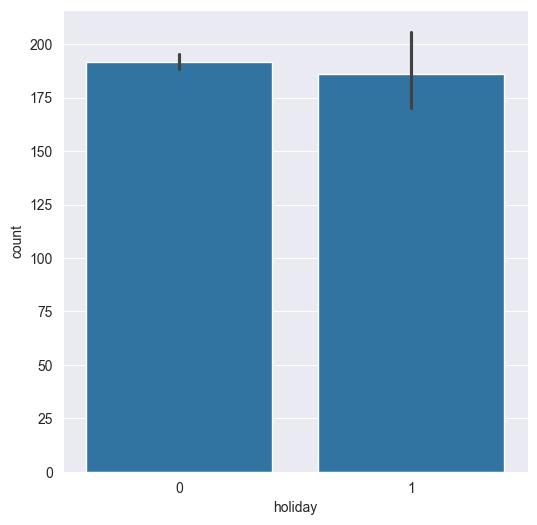

In [7]:
fig = plt.figure(figsize=(6, 6))
sns.barplot(x="holiday", y="count", data=train_df)
plt.show()

平日に借りる人は出勤している人なので定期的に借りている人が多いためエラーバーが小さい。\
休日に借りる人は不定期なのでエラーバーが大きい。\
平日、休日に関してあまり差がない。\
→ これについては相関係数を見た時から分かっていたことなのでまあそうなんだなという感じ。

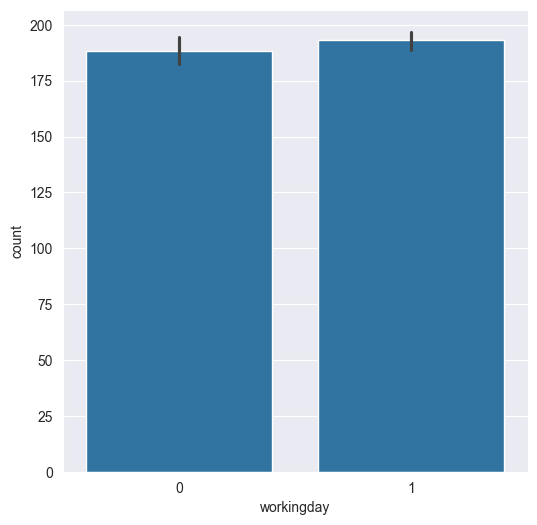

In [8]:
fig = plt.figure(figsize=(6, 6))
sns.barplot(x="workingday", y="count", data=train_df)
plt.show()

労働日についてもあまり差がない。\
→ これについても相関係数時点でまあそうなんだなと

ただ、エラーバーの大きさが違うのだけ気になる。\
→ holidayは休日じゃなく祝日なので、祝日の方がエラーバーが大きいのはそうかも。

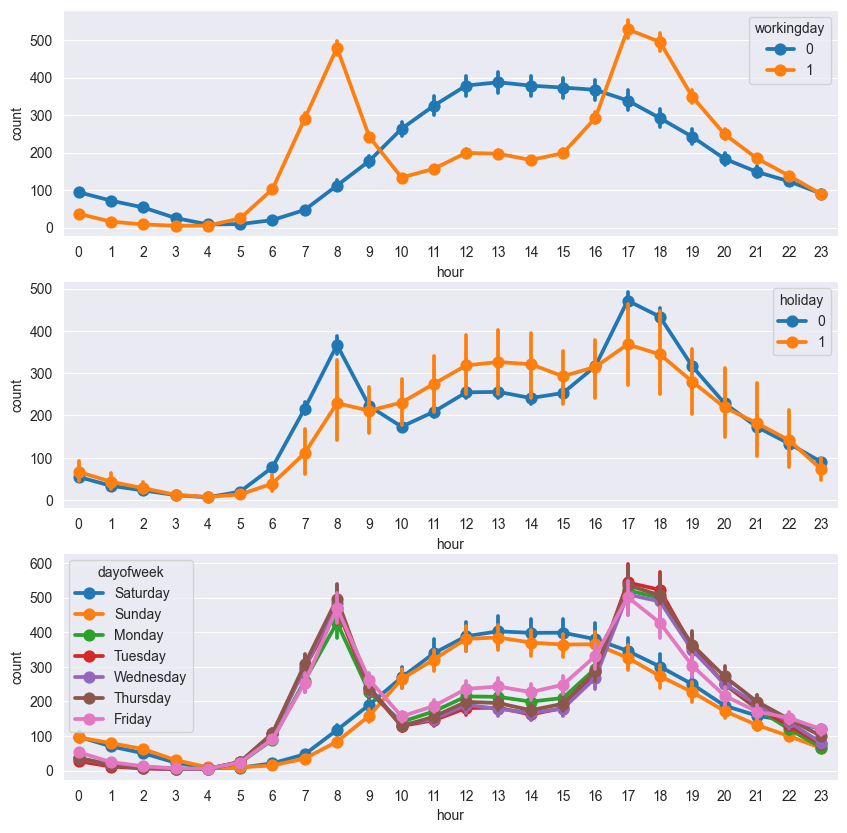

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
sns.pointplot(x="hour", y="count", hue="workingday", data=train_df, ax=axes[0])
sns.pointplot(x="hour", y="count", hue="holiday", data=train_df, ax=axes[1])
sns.pointplot(x="hour", y="count", hue="dayofweek", data=train_df, ax=axes[2])
plt.show()

労働日は仕事に行く朝の時間帯と帰る夕方の時間帯に利用者が多い。\
→ hourとcountの相関係数は0.4なので、労働日と組み合わせた特徴量を入れてあげるといいかも。

holidayは逆にノイズになってる可能性もあるので、有り無しで精度を比較してみるといいかも。